# Lab Assignment 11: Data Visualizations
## DS 6001: Practice and Application of Data Science

- Name: Congxin (David) Xu
- Computing ID: cx2rx
- Room: 9

### Instructions
Please answer the following questions as completely as possible using text, code, and the results of code as needed. Format your answers in a Jupyter notebook. To receive full credit, make sure you address every part of the problem, and make sure your document is formatted in a clean and professional way.

## Problem 0
Import the following libraries:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Problem 1
Write a short paragraph that provides a critique of the following data visualizations. What's good about each figure, and what's not good? Pay particular attention to how well the figure communicates information to a general audience and tells a complete story. Make specific references to the ideas discussed in the first section of the Module 11 Jupyter notebook.

### Part a
<img src="https://i.reddituploads.com/09d4079fd0bf453586b8524478aac4fd?fit=max&h=1536&w=1536&s=0d63d22eed3d44a41002007990acdf2c" width='500'>

[1 point]

I think this graph has clearly labeled the percentage numbers on each column, which is very easy for readers to understanding. However, not all four columns are on the same scale. The last category `NOT AT ALL` seems to be on a secondard axis. Another improvement this bar chart can do is to make the primary y axis start from 0.

### Part b
<img src="https://www.designyourway.net/diverse/2/wronginfo/59426786926.jpg" width='600'>

[1 point]

One good thing about this visualization is that it sorts the percentage value from the smallest to the largest. It gives the reader some sense of ordering. I think this graph has clearly labeled the percentage numbers on each pie, but on the other hand the visualization is poorly represented and it has to use the percentage to reenforce the story. The pie chart is misleading because people may visually use the area of the pie to compare the different between different category. It violates the rule of proportional ink.

### Part c
<img src="https://i.imgur.com/sTVYOIH.jpg" width='400'>

[1 point]

The area "under the curve" is colored with "red", which provide the readers a sense of severity. The graph uses white color for the text in a red background, making the text relatively easier to read. The y axis starts from the top of the graph and it goes down as the value of y increases. This is certainly counter-intuitive to most readers.

## Problem 2
For the rest of this lab, we will once again be working with the 2019 General Social Survey.

In [2]:
%%capture
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

Here is code that cleans the data and gets it ready to be used for data visualizations:

In [3]:
mycols = ['id', 'wtss', 'sex', 'educ', 'region', 'age', 'coninc',
          'prestg10', 'mapres10', 'papres10', 'sei10', 'satjob',
          'fechld', 'fefam', 'fepol', 'fepresch', 'meovrwrk'] 
gss_clean = gss[mycols]
gss_clean = gss_clean.rename({'wtss':'weight', 
                              'educ':'education', 
                              'coninc':'income', 
                              'prestg10':'job_prestige',
                              'mapres10':'mother_job_prestige', 
                              'papres10':'father_job_prestige', 
                              'sei10':'socioeconomic_index', 
                              'fechld':'relationship', 
                              'fefam':'male_breadwinner', 
                              'fehire':'hire_women', 
                              'fejobaff':'preference_hire_women', 
                              'fepol':'men_bettersuited', 
                              'fepresch':'child_suffer',
                              'meovrwrk':'men_overwork'},axis=1)
gss_clean.age = gss_clean.age.replace({'89 or older':'89'})
gss_clean.age = gss_clean.age.astype('float')

The `gss_clean` dataframe now contains the following features:

* `id` - a numeric unique ID for each person who responded to the survey
* `weight` - survey sample weights
* `sex` - male or female
* `education` - years of formal education
* `region` - region of the country where the respondent lives
* `age` - age
* `income` - the respondent's personal annual income
* `job_prestige` - the respondent's occupational prestige score, as measured by the GSS using the methodology described above
* `mother_job_prestige` - the respondent's mother's occupational prestige score, as measured by the GSS using the methodology described above
* `father_job_prestige` -the respondent's father's occupational prestige score, as measured by the GSS using the methodology described above
* `socioeconomic_index` - an index measuring the respondent's socioeconomic status
* `satjob` - responses to "On the whole, how satisfied are you with the work you do?"
* `relationship` - agree or disagree with: "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work."
* `male_breadwinner` - agree or disagree with: "It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family."
* `men_bettersuited` - agree or disagree with: "Most men are better suited emotionally for politics than are most women."
* `child_suffer` - agree or disagree with: "A preschool child is likely to suffer if his or her mother works."
* `men_overwork` - agree or disagree with: "Family life often suffers because men concentrate too much on their work."

### Part a
Reorder the categories of `relationship` to "strongly agree", "agree", "disagree", and "strongly disagree".

Then create a simple barplot that shows the frequencies of the categories of `relationship` three times: 
* once using `matplotlib` alone, 
* once using `seaborn`, 
* and once using the `.plot()` method from `pandas`. 

Make sure each barplot has descriptive axis labels and a title, and set a good size for each figure displayed in the Jupyter notebook. [2 points]

''

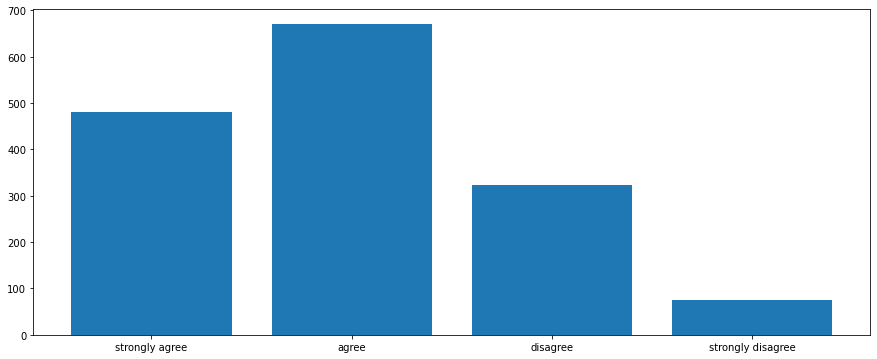

In [4]:
gss_clean['relationship'] = gss_clean['relationship'].astype('category')
gss_clean['relationship'] = gss_clean['relationship'].cat.\
    reorder_categories(["strongly agree", "agree", "disagree",  "strongly disagree"])

mybars = gss_clean.relationship.value_counts().sort_index()
plt.figure(figsize=(15, 6))
plt.bar(mybars.index, mybars.values)

;

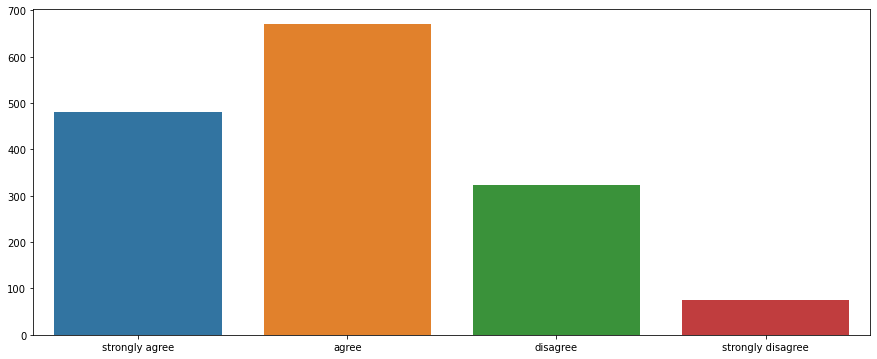

In [5]:
plt.figure(figsize=(15, 6))
sns.barplot(x=mybars.index, y=mybars.values);

### Part b
Create two barplots that show 
* the frequency of the different levels of agreement for `relationship` for men and for women on the same plot, 
* with bars for men and bars for women side-by-side,
* using different colors for the bars for men and the bars for women,
* listing these colors and the sex they refer to in a legend,
* and labeling each bar with the number the bar represents.

Create the first barplot using `seaborn` with the bars oriented vertically, and create the second barplot using the `.plot()` method with the bars oriented horizontally. [2 points]

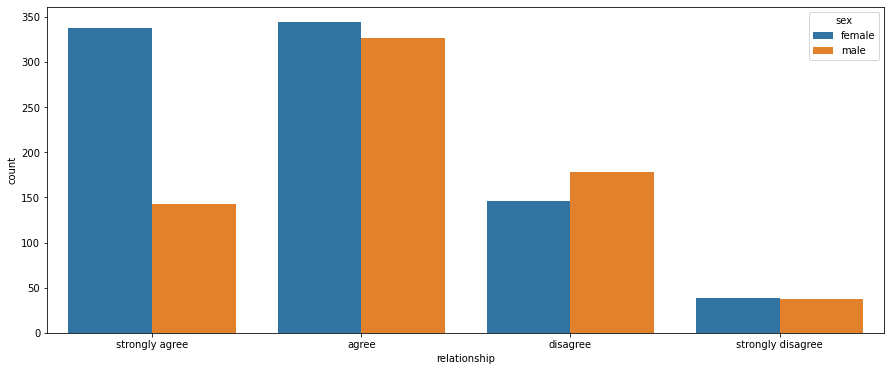

In [6]:
plot2 = gss_clean[['id','sex', 'relationship']].\
    groupby(['sex', 'relationship']).count().\
    reset_index()
plot2 = plot2.rename({'id': 'count'}, axis = 1)
plt.figure(figsize=(15, 6))
sns.barplot(x='relationship', y='count', hue='sex', data=plot2);

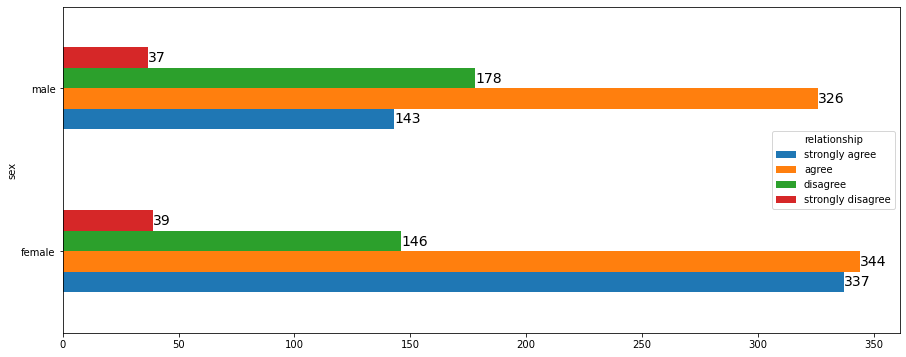

In [7]:
xtab = pd.crosstab(gss_clean.sex, gss_clean.relationship)
myplot = xtab.plot(kind='barh', figsize = [15,6])

for rect in myplot.patches:
    ycoor = rect.get_y() + .5*rect.get_height()
    xcoor = rect.get_width()
    plt.text(xcoor, ycoor, str(int(xcoor)), 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14)

### Part c
Create a visualization with 
* nine barplots, arranged in a 3x3 grid. 
* The barplots should refer to each of the nine categories of `region`, 
* and each barplot should be given a label that contains the name of the region.
* Within each barplot, list the categories of `relationship`,
* and display horizontal bars.

Only one figure is required. Use `seaborn`, `matplotlib`, and `.plot()` as you see fit. [2 points]

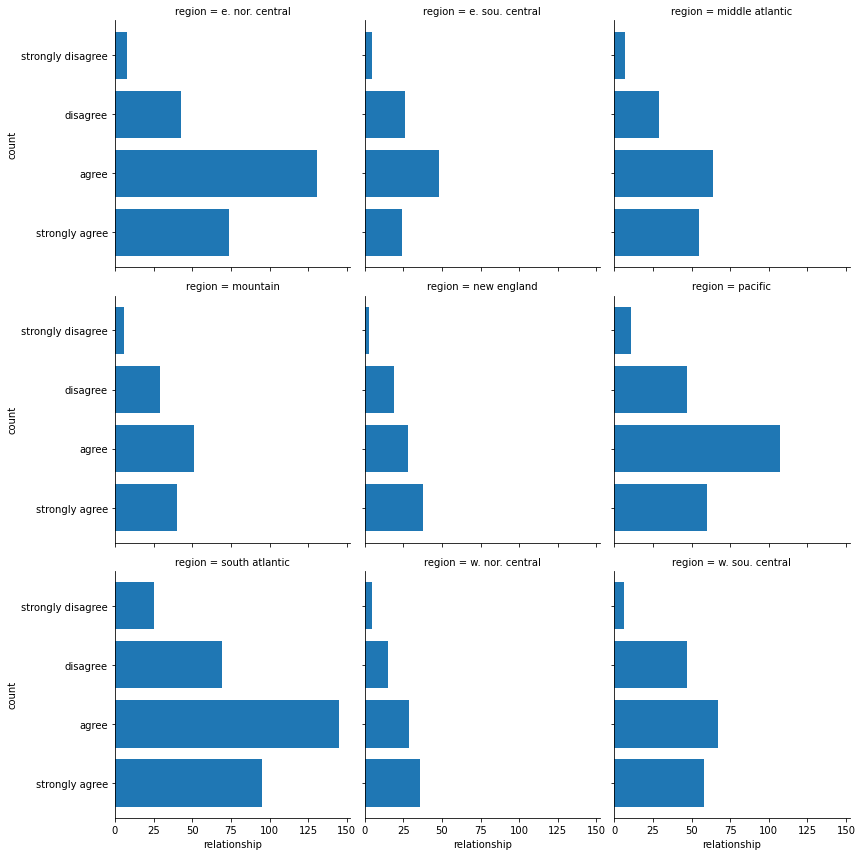

In [23]:
plot3 = gss_clean[['id','region', 'relationship']].\
    groupby(['region', 'relationship']).count().reset_index()
plot3 = plot3.rename({'id': 'count'}, axis = 1)
plot3

g = sns.FacetGrid(plot3, col = 'region', col_wrap=3, height=4, aspect=1)
g.map(plt.barh, 'relationship', 'count');

## Problem 3
Write code that exactly replicates the following figures, including all aesthetic choices. **Don't worry, however, about making the size of the figures exactly the same as that varies from browser to browser.** All of the following figures are generated by a primary graphing function from `seaborn`. 

### Part a
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/parta.png" width='700'>

[Hint: the values of occuptational prestige and socioeconomic status are the means of `job_prestige` and `socioeconomic_index` within years of `education`. Note that values of `education` less than 8 are excluded.] [2 points]

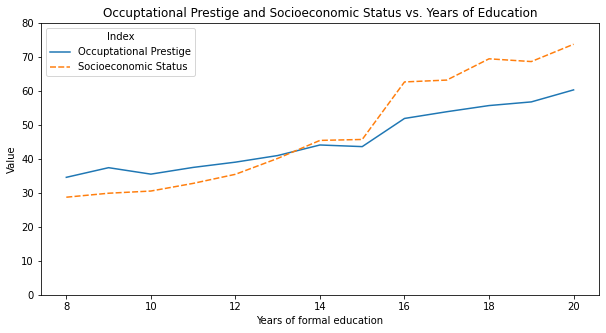

In [34]:
job = gss_clean[['job_prestige','education']].\
    groupby(['education']).mean().reset_index().query('education >= 8')

job = job.rename({'job_prestige': 'Value'}, axis = 1)
job['Index'] = 'Occuptational Prestige'

plot4 = gss_clean[['socioeconomic_index','education']].\
    groupby(['education']).mean().reset_index().query('education >= 8')
plot4['Index'] = 'Socioeconomic Status'
plot4 = plot4.rename({'socioeconomic_index': 'Value'}, axis = 1)

plot4 = job.append(plot4)

plt.figure(figsize=(10,5))
sns.lineplot(x='education', y='Value', 
             hue='Index', style='Index',
             data=plot4)
plt.xlabel('Years of formal education')
plt.title('Occuptational Prestige and Socioeconomic Status vs. Years of Education')
plt.ylim(0,80);

### Part b
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/partb.png" width='700'>

[Hint: to match the color scheme, you will need to set `center=0`.] [2 points]

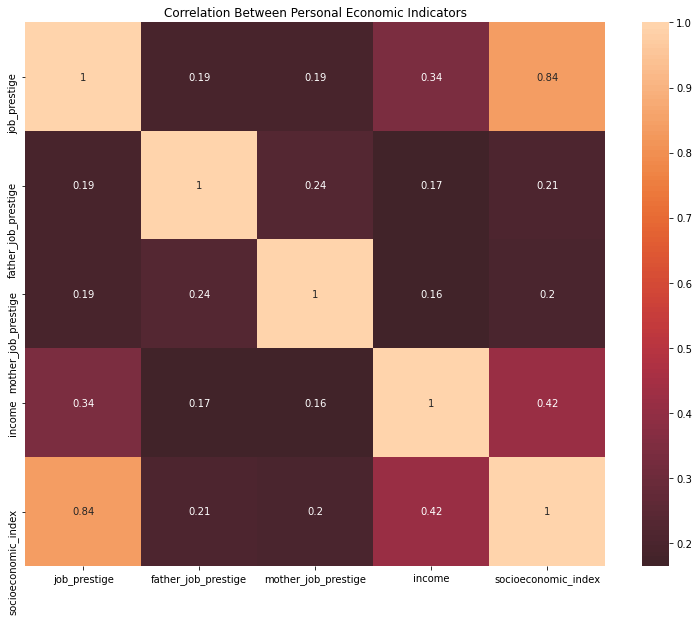

In [32]:
my_corr = gss_clean[['job_prestige','father_job_prestige', 'mother_job_prestige', 'income', 'socioeconomic_index']].corr()
plt.figure(figsize = (13,10))
sns.heatmap(my_corr, annot=True, center=0)
plt.title("Correlation Between Personal Economic Indicators");

### Part c
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/partc2.png" width='600'>

[Hint: The individual plots inside the grid have `height=4` and `aspect=1`, and to include the overall title I used
```
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
```
You will first need to create a version of `education` that collapses values from 0 to 10 to "10 years or fewer" and collapses values from 17 to 20 to "More than 16 years". You can use `.map()`, `.replace()`, or `pd.cut()` to do that.] [3 points]

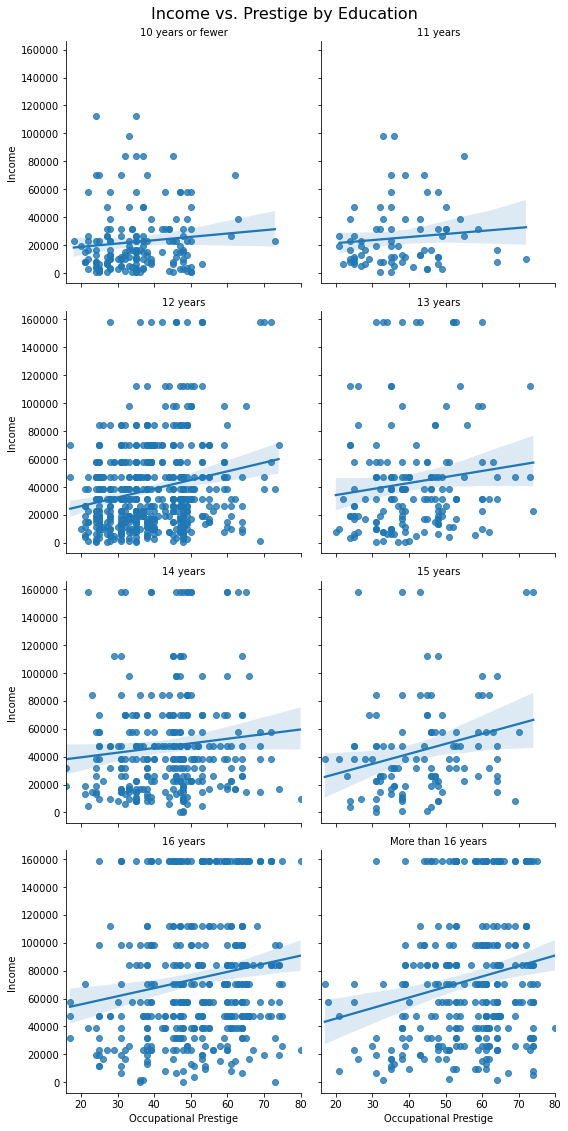

In [44]:
gss_clean['education_group'] = pd.cut(gss_clean.education, 
                                      bins=[0,10,11,12,13,14,15,16,100], 
                                      labels=("10 years or fewer", "11 years", "12 years",
                                              "13 years","14 years","15 years",
                                              "16 years", "More than 16 years"))
    
plot5 = gss_clean[['education_group', 'income', 'job_prestige']]
plot5

g = sns.FacetGrid(plot5, col = 'education_group', col_wrap=2, height=4, aspect=1)
g.map(sns.regplot, 'job_prestige', 'income');
g.set_titles('{col_name}')
g.set_axis_labels('Occupational Prestige', 'Income')
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16);

## Problem 4
There is a consistent finding that in the United States that [women get paid only 80% of what men get paid](https://nwlc.org/issue/equal-pay-and-the-wage-gap/). Other research however finds that the gap is much smaller when comparing [men and women who hold the same job](https://www.politifact.com/factchecks/2018/apr/13/tina-smith/do-women-get-only-80-percent-pay-men-do-same-job/). In this problem you will use the GSS data to investigate the following questions:

1. Do men have higher incomes than women?

2. If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women?

You may use any kind of data visualization and you may use multiple visualizations to find an answer to these questions. In order to receive credit for this problem, you must write in text what parts of your visualizations are important and what we should learn from the visualizations to answer the questions. Please consider the entire distributions of income and occupational prestige, not just the means or medians. [4 points]

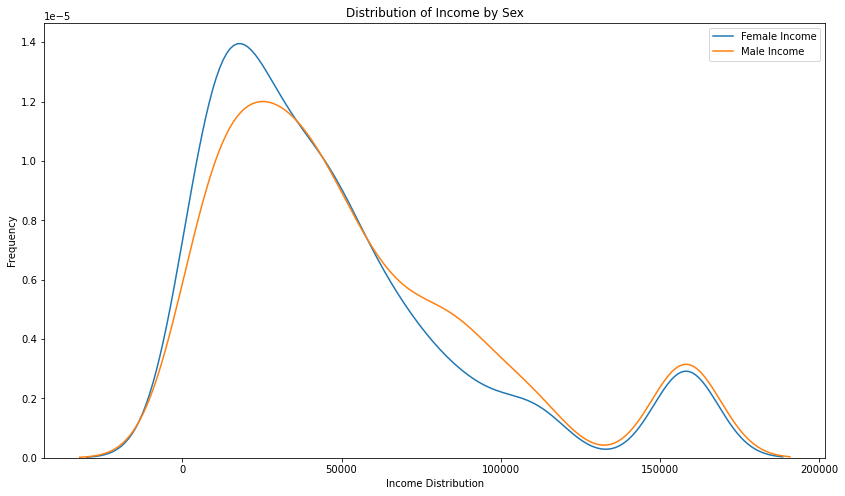

In [57]:
plt.figure(figsize=(14,8))
sns.kdeplot(gss_clean.query("sex == 'female'").income, shade = True, label='Female Income')
sns.kdeplot(gss_clean.query("sex == 'male'").income, shade = True, label='Male Income')
plt.ylabel('Frequency')
plt.xlabel('Income Distribution')
plt.title('Distribution of Income by Sex')
plt.legend();

In [60]:
gss_clean['job_prestige_group'] = pd.cut(gss_clean.job_prestige, 
                                      bins=[0,20,30,40,50,60,70,100], 
                                      labels=("< 20", "20 - 30", "30 - 40",
                                              "40 - 50","50 - 60","60 - 70",
                                              "70 - 80"))
    
plot6 = gss_clean[['job_prestige_group', 'sex', 'job_prestige']]
plot6

# g = sns.FacetGrid(plot5, col = 'job_prestige_group', col_wrap=2, height=4, aspect=1)
# g.map(sns.kdeplot, 'income');
# g.set_titles('{col_name}')
# g.set_axis_labels('Occupational Prestige', 'Income')
# g.fig.subplots_adjust(top=.95)
# g.fig.suptitle('Income vs. Prestige by Education', fontsize=16);

,job_prestige_group,sex,job_prestige
0,40 - 50,male,47.0
1,20 - 30,female,22.0
2,60 - 70,male,61.0
3,50 - 60,female,59.0
4,50 - 60,male,53.0
...,...,...,...
2343,40 - 50,female,47.0
2344,20 - 30,female,28.0
2345,30 - 40,female,40.0
2346,40 - 50,male,47.0


In [58]:
gss_clean.job_prestige.describe()

count    2248.000000
mean       44.682384
std        13.644987
min        16.000000
25%        35.000000
50%        45.000000
75%        53.000000
max        80.000000
Name: job_prestige, dtype: float64